In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib ipympl

C:\Users\USER\AppData\Local\Temp\ipykernel_30708\1592083515.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
%store -r

In [3]:
# Define all rows to exclude as NaN
for i in range (len(raw_data.index)):
    if raw_data.index[i] in rows_to_remove_val:
        raw_data.loc[raw_data.index[i]] = np.nan

In [4]:
# Calculate the baseline for each row (mean of given range)
baseline_only_table = raw_data[raw_data.columns[baseline_start_val : baseline_end_val]]
baseline_mean = baseline_only_table.mean(axis=1)
# display(baseline_mean)

# Subtract each baseline value from relevant row
bsl_subtracted_data = raw_data.sub(baseline_mean, axis=0)
# display(bsl_subtracted_data)

In [5]:
# Find max value in given normalization range
normalization_range_only = bsl_subtracted_data[bsl_subtracted_data.columns[range_ofMax_start_val : range_ofMax_end_val]]
# display(normalization_range_only)
max_values = normalization_range_only.max(axis=1)
# display(max_values)

# Divide each row by relevant max value
normalized_data = bsl_subtracted_data.div(max_values, axis=0)
# display(normalized_data)

In [6]:
plt.ioff()

rows = 6
cols = 12
fig, axes = plt.subplots(rows, cols, figsize=(60, 30))
for i in range(rows):
        for j in range(cols):
            # Calculate the index of the current graph in the matrix
            graph_index = i + j * rows
            if graph_index < len(raw_data.index):
                
                # Extract the data and create the corresponding x-axis values
                y_values = normalized_data.iloc[graph_index]
                x_values = normalized_data.columns
                
                # Plot the data on the current subplot
                axes[i, j].plot(x_values, y_values)
                axes[i,j].set_xticks([])
                axes[i,j].set_title(normalized_data.index[graph_index])

fig.tight_layout()
plt.savefig('normalized.pdf')


In [9]:

sample_title = []
average_data = pd.DataFrame(columns=normalized_data.columns)
if rep_value == 2 or 3:
   for i in range (0,len(normalized_data.index),rep_value):
       
       average = pd.Series(normalized_data.iloc[i : i+rep_value].mean()).T
       average_data.loc[i/3] = average
       sample_title.append(f'{normalized_data.index[i]} to {normalized_data.index[i+rep_value -1]}')
       

average_data.index = sample_title

average_data.to_excel("Average_data.xlsx")
# display(average_data)

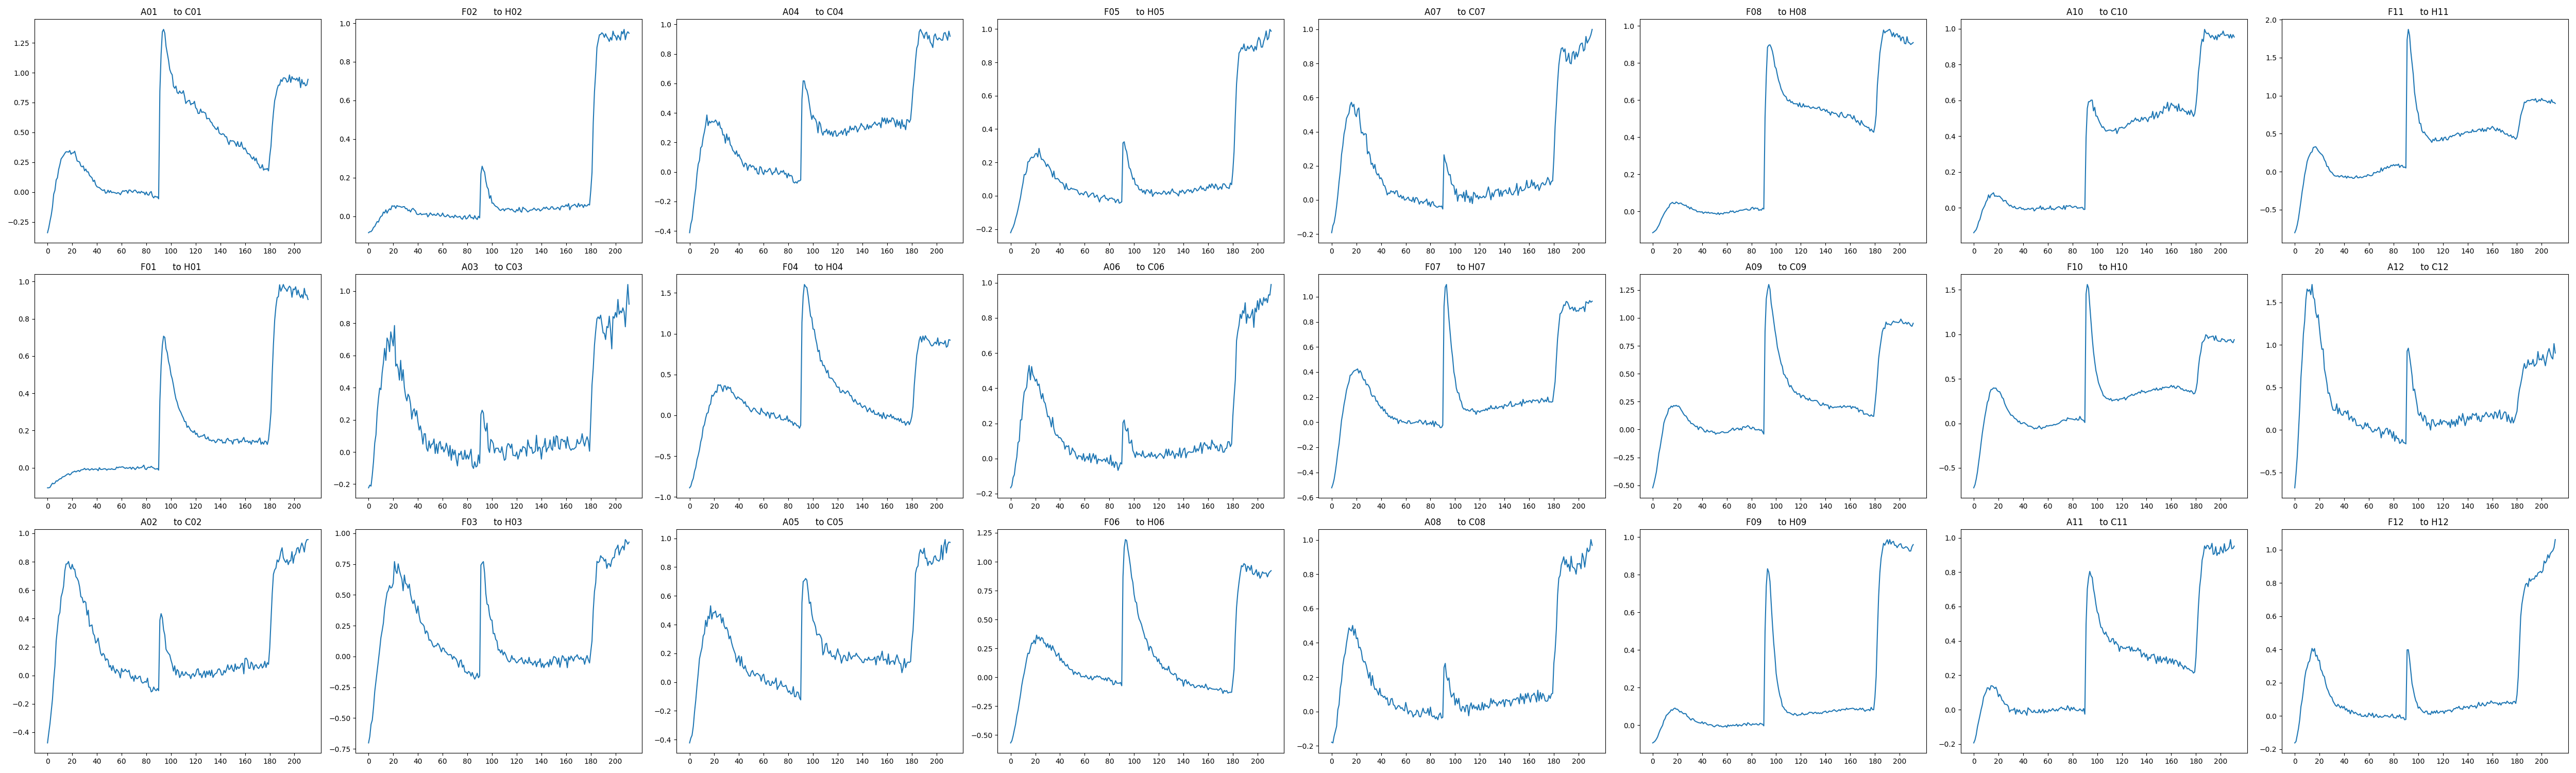

In [8]:
plt.ion()

rows = 3
cols = 8
fig, axes = plt.subplots(rows, cols,figsize=(50, 15))
for i in range(rows):
        for j in range(cols):
            # Calculate the index of the current graph in the matrix
            graph_index = i + j * rows
            if graph_index < len(average_data.index):
                
                # Extract the data and create the corresponding x-axis values
                y_values = average_data.iloc[graph_index]
                x_values = average_data.columns
                
                # Plot the data on the current subplot
                axes[i, j].plot(x_values, y_values)
                axes[i,j].set_title(f'{average_data.index[graph_index]}')
                axes[i,j].set_xticks(np.arange(0, len(x_values)+1, 20))
fig.tight_layout()
plt.savefig('Average_plots.pdf')

